# SEIR model

It’s an acronym for Susceptible, Exposed, Infected, Recovered

The differential equations describing SIR model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)].

The model classifies the population into four mutually exclusive groups: susceptible (at risk of contracting the disease), exposed (infected but not yet infectious), infectious (capable of transmitting the disease), and removed (those who recover or die from the disease).

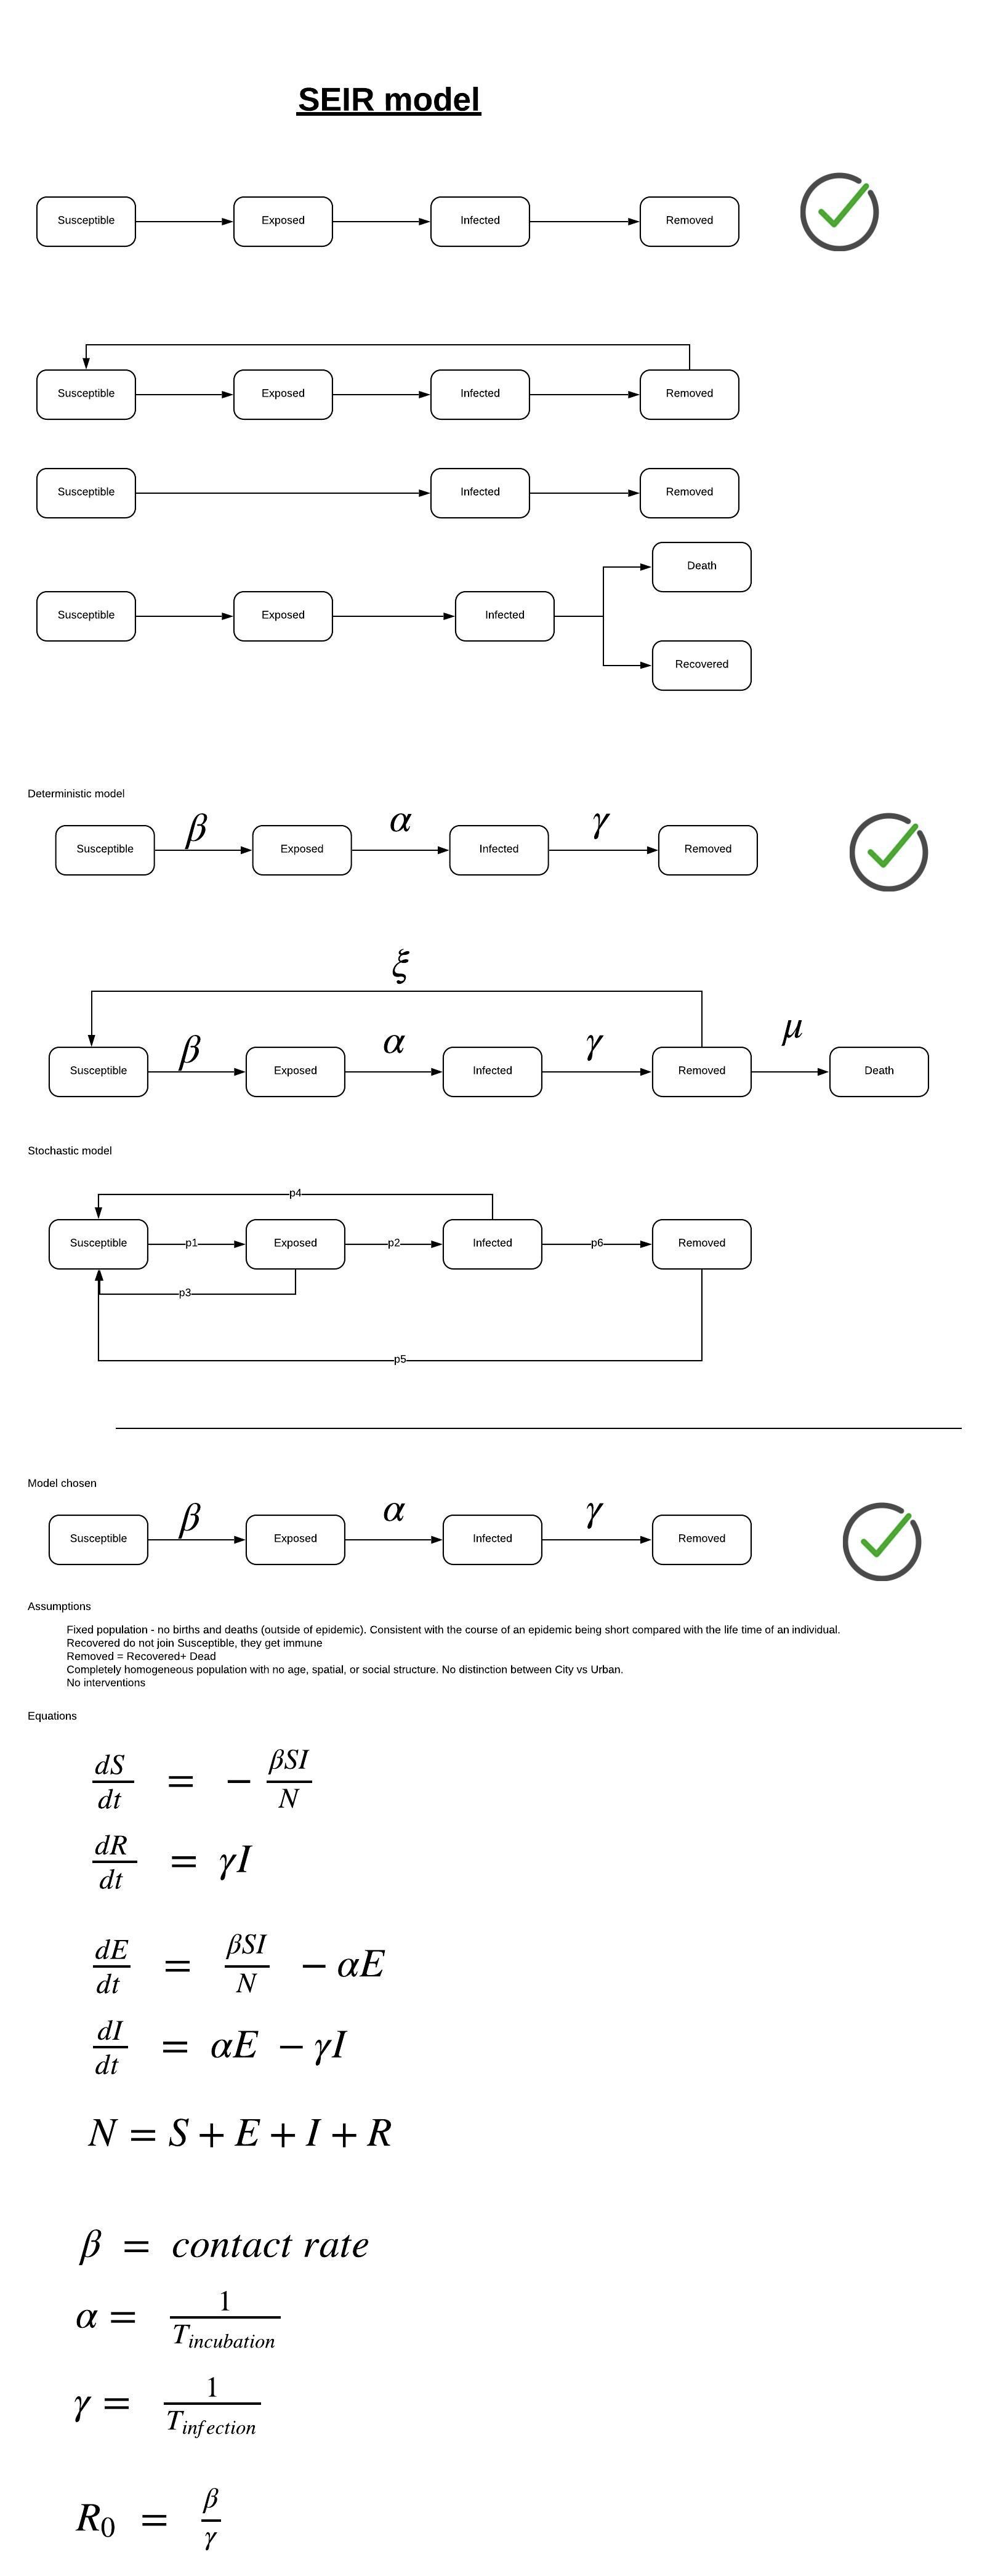

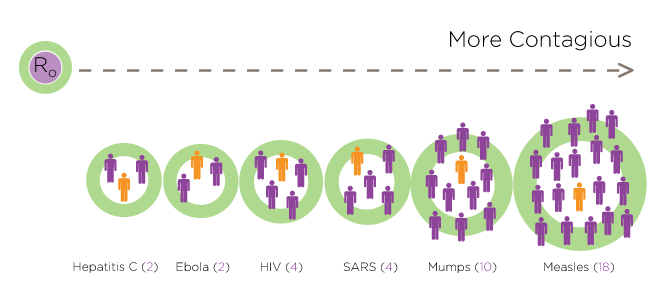

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R])

In [ ]:
def population_seir_model(init_vals, params, t, N):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, gammaT = params
    dt = t[1] - t[0]
    i=0
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt/N
        next_E = E[-1] + (beta*S[-1]*I[-1]/N - alpha*E[-1])*dt
        if(gamma != None):
            next_R = R[-1] + (gamma*I[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        else:
            next_R = R[-1] + (gammaT[i]*I[-1])*dt
            next_I = I[-1] + (alpha*E[-1] - gammaT[i]*I[-1])*dt
            i=i+1
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R])